<a href="https://colab.research.google.com/github/utpalrtw/git-practive/blob/master/210260043_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Aim:**
 To determine the decay time of the excited triplet state $ ^3 ZnTPP*$ after it is populated by a pump laser pulse and compare the results with different initial concentrations of the ZnTPP sample.

###**Theory:**

We use the measurement of a quantity called the transient absorption (TA or $\Delta A$ from here on) as a proxy for the concentration of $ ^3 ZnTPP*$. The way we choose our probe and pump wavelengths enables us to do this in the following way:
In general the transient absorption is defined as the absorbance of the sample (for the probe wavelength) when the pump laser is on minus the absorbance without the pump laser. This of course depends on the wavelength of the pump laser and the delay time of the pump laser with the probe laser.


So, $\Delta A$= A(with pump, $\lambda$, $\tau$)- A(without pump).

Absorbance is of course defined as $A=-log(\frac{I}{I_0})$ where I is the intensity of the probe wavelength light coming out of the sample and $I_0$ is the intensity of the light going into the sample.

Now apriori we cannot say whether this quantity will be positive or negative, since there are a number of competing effects. When the pump is present, there is of  a higher concentration of the excited product ($ ^3 ZnTPP*$ and others) which means that there are more electrons in an excited state. This means that when the probe laser is incident on them, stimulated emission is possible leading to more light coming out of the sample and a lower absorbance with the pump present. So taking this into account only, we would expect a negative transient absorption. There is also ground state bleaching, which is the fact that when the pump is present there are simply fewer electrons left in the ground state to excite which should again reduce the absorbance. As it turns out for us, neither of us these effects are important because our probe wavelength of 450nm exactly corresponds to the energy difference between $ ^3 ZnTPP*$ and a higher excited state. So when there is more $ ^3 ZnTPP*$ present, more photons are absorbed to excite $ ^3 ZnTPP*$ electrons to that higher energy state and we see a positive TA. This is the dominant effect and we can safely correlate our measured TA with $ ^3 ZnTPP*$ concentration. Additionally, in some set ups $ ^3 ZnTPP*$ also forms another product molecule with $C_{70}$ (if that is present in our sample) that is capable of absorbing 450 nm photons which would lead to a further positive TA in the presence of $ ^3 ZnTPP*$.
This is called photoproduct absorption.

Our experimental set up is such that the detector only recieves the probe laser wavelength of 450 nm and no pump wavelength of 520 nm. This is done both physically by angling the pump laser towards the sample, but away from the detector and also with a low pass filter placed in front.

In [127]:
import numpy as np
import pandas as pd

Link for 1 mili molar data : {https://drive.google.com/file/d/1P_IgYq_34F9BPDATyGKFbbETOJOOD-8C/view?usp=drive_link}

In [128]:
data_1mm = pd.read_csv('1 mili molar.csv', delimiter=';')

In [129]:
data_1mm.head()

,Laser Delay [ns],TA [mOD]
0,-400,-0.100379
1,-390,0.149352
2,-380,0.133574
3,-370,-0.242877
4,-360,0.082745


In [130]:
X_axis = data_1mm.iloc[52:-1,0].values
Y_axis = data_1mm.iloc[52:-1,1].values

In [131]:
import matplotlib.pyplot as plt

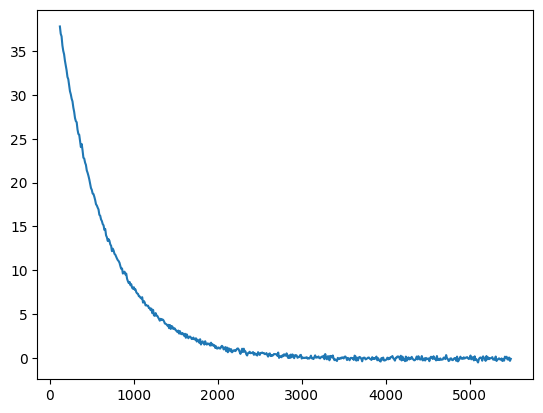

In [132]:
plt.plot(X_axis, Y_axis)
plt.show()

In [133]:
from scipy.optimize import curve_fit

In [134]:
X_axis = np.array(X_axis)
Y_axis = np.array(Y_axis)

In [135]:
def exp(x,a, b):
    return a*np.exp(b*x)

In [136]:
popt, pcov = curve_fit(exp, X_axis, Y_axis, p0 = [500, -0.00033333333])

In [137]:
popt

array([ 4.70133515e+01, -1.78720220e-03])

The exponent is:

In [138]:
popt[1]

-0.0017872021975416624

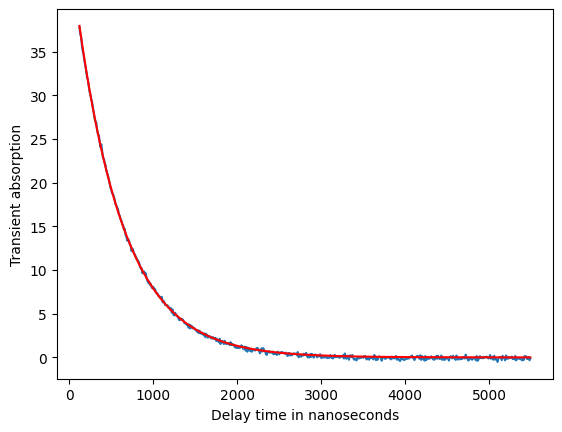

In [139]:
plt.plot(X_axis, Y_axis)
plt.plot(X_axis, exp(X_axis, *popt), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption')
plt.show()

In [140]:
lifetime = -1/popt[1]

In [141]:
#lifetime in nanoseconds
lifetime

559.5337793202823



---



Data link for 1 mili molar traces data: {https://drive.google.com/file/d/1JAW6SY38zcLqNFYK-2kLQTMnvjQc3Xl3/view?usp=drive_link}

Now we do for individual trials.

In [142]:
data_1mm_traces = pd.read_csv('1 mili molar_traces.csv', delimiter=';')

In [143]:
data_1mm_traces.head()


,Laser Delay [ns],TA1 [mOD],TA2 [mOD],TA3 [mOD],TA4 [mOD],TA5 [mOD]
0,-400,-0.456297,-0.177367,-0.170730,0.088741,0.213758
1,-390,0.749525,0.054656,-0.265236,-0.252550,0.460362
2,-380,0.115626,-0.039016,-0.268722,0.817982,0.042002
3,-370,-0.090943,-0.431305,-0.155191,-0.196953,-0.339994
4,-360,-0.186581,-0.300270,0.561957,-0.123552,0.462172


In [144]:
x_axis = data_1mm_traces.iloc[52:-1,0].values
y1_axis = data_1mm_traces.iloc[52:-1,1].values
y2_axis = data_1mm_traces.iloc[52:-1,2].values
y3_axis = data_1mm_traces.iloc[52:-1,3].values
y4_axis = data_1mm_traces.iloc[52:-1,4].values
y5_axis = data_1mm_traces.iloc[52:-1,5].values

In [145]:
popt1, pcov1 = curve_fit(exp, x_axis, y1_axis, p0 = [500, -0.00033333333])
popt2, pcov2 = curve_fit(exp, x_axis, y2_axis, p0 = [500, -0.00033333333])
popt3, pcov3 = curve_fit(exp, x_axis, y3_axis, p0 = [500, -0.00033333333])
popt4, pcov4 = curve_fit(exp, x_axis, y4_axis, p0 = [500, -0.00033333333])
popt5, pcov5 = curve_fit(exp, x_axis, y5_axis, p0 = [500, -0.00033333333])

In [146]:
lifetimes = np.array([-1/popt1[1], -1/popt2[1], -1/popt3[1], -1/popt4[1], -1/popt5[1]])

transient absorption vs. delay time in nanoseconds graph for trials , along with its fit.

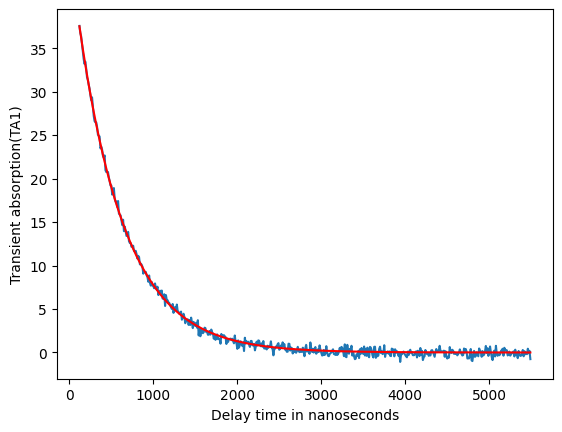

In [147]:
plt.plot(x_axis, y1_axis)
plt.plot(x_axis, exp(x_axis, *popt1), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA1)')
plt.show()

In [148]:
popt1

array([ 4.65112803e+01, -1.79124926e-03])

In [149]:
#decay time t1(in nanosecond)
lifetimes[0]

558.2695946364383

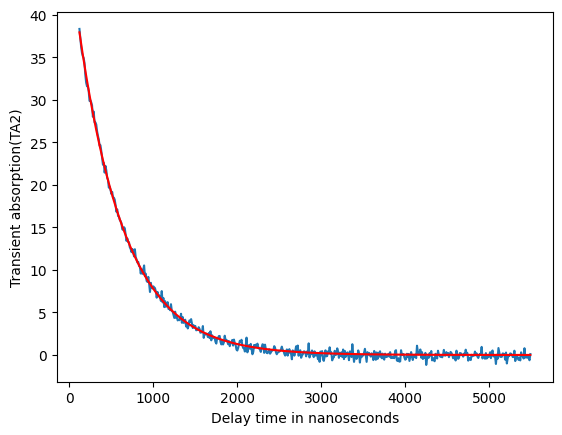

In [150]:
plt.plot(x_axis, y2_axis)
plt.plot(x_axis, exp(x_axis, *popt2), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA2)')
plt.show()

In [151]:
popt2

array([ 4.70633354e+01, -1.80172112e-03])

In [152]:
#decay time t2 in nanosecons
lifetimes[1]

555.0248529742739

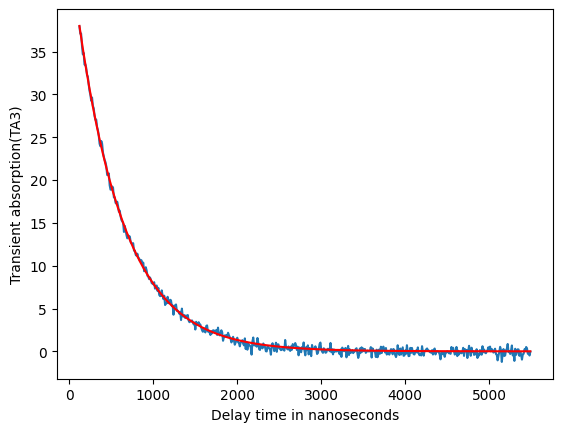

In [153]:
plt.plot(x_axis, y3_axis)
plt.plot(x_axis, exp(x_axis, *popt3), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA3)')
plt.show()

In [154]:
popt3

array([ 4.70923208e+01, -1.78613213e-03])

In [155]:
#decay time t3 in nanosecond
lifetimes[2]

559.8689933705107

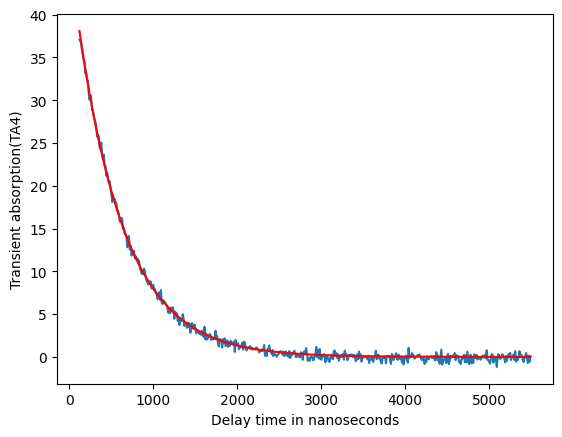

In [156]:
plt.plot(x_axis, y4_axis)
plt.plot(x_axis, exp(x_axis, *popt4), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA4)')
plt.show()


In [157]:
popt4

array([ 4.71703023e+01, -1.77902686e-03])

In [158]:
#decay time t4 in nanosecond
lifetimes[3]

562.1050589645927

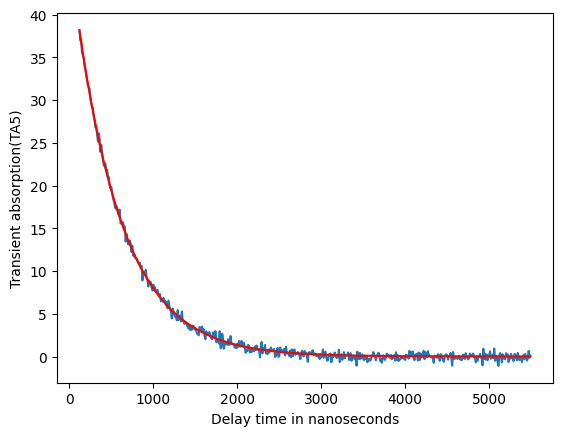

In [159]:
plt.plot(x_axis, y5_axis)
plt.plot(x_axis, exp(x_axis, *popt5), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA5)')
plt.show()

In [160]:
popt4

array([ 4.71703023e+01, -1.77902686e-03])

In [161]:
#decay time t5 in nanosecond
lifetimes[4]

562.3490426441783

if we plot lifetimes obtained by the various trials we get the following

In [162]:
series = pd.Series([1,2,3,4,5])

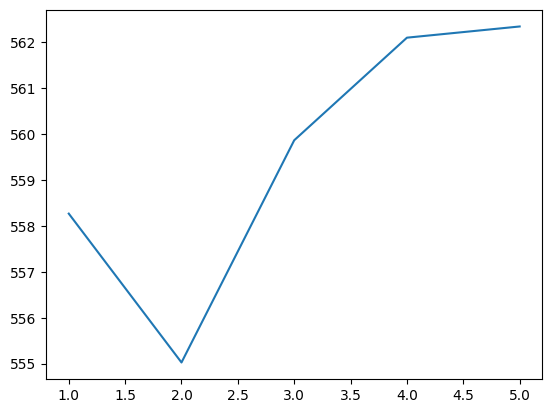

In [163]:
plt.plot(series, lifetimes)

In [164]:
lifetimes.mean()

559.5235085179987

on-avg we get lifetime nearly 560 ns

In [165]:
lifetime # for avg absorption over all 5 trials

559.5337793202823

both value are very close for individual trials and  for avg absorption

Now, we repeat exactly all of the above analysis for the 0.3mm sample

link for 0.3mm data set : {https://drive.google.com/file/d/1MeWBi1T12rTnJjHwOOz4jSfpMQPU_gA6/view?usp=drive_link}

In [166]:
data_03mm_traces = pd.read_csv('/content/0.3 mm_traces.csv', delimiter=';')

In [167]:
data_03mm_traces.head()

,Laser Delay [ns],TA1 [mOD],TA2 [mOD],TA3 [mOD],TA4 [mOD],TA5 [mOD]
0,-400,-0.448254,-0.579706,0.217482,-0.306958,0.238215
1,-390,-0.444687,-0.269020,0.423669,0.470011,-0.031999
2,-380,-0.262868,0.245429,-0.225178,0.449998,0.538752
3,-370,-0.514787,-0.019933,-0.067246,-0.172020,-0.072670
4,-360,-0.037660,-0.397770,-0.066211,-0.391707,0.121937


In [168]:
x1 = data_03mm_traces.iloc[52:-1,0].values
y1_03mm = data_03mm_traces.iloc[52:-1,1].values
y2_03mm = data_03mm_traces.iloc[52:-1,2].values
y3_03mm = data_03mm_traces.iloc[52:-1,3].values
y4_03mm = data_03mm_traces.iloc[52:-1,4].values
y5_03mm = data_03mm_traces.iloc[52:-1,5].values

In [169]:
potp01, pcov01 = curve_fit(exp, x1, y1_03mm, p0 = [500, -0.00033333333])
potp02, pcov02 = curve_fit(exp, x1, y2_03mm, p0 = [500, -0.00033333333])
potp03, pcov03 = curve_fit(exp, x1, y3_03mm, p0 = [500, -0.00033333333])
potp04, pcov04 = curve_fit(exp, x1, y4_03mm, p0 = [500, -0.00033333333])
potp05, pcov05 = curve_fit(exp, x1, y5_03mm, p0 = [500, -0.00033333333])

In [170]:
#list of lifetimes
lifetimes_03mm = np.array([-1/potp01[1], -1/potp02[1], -1/potp03[1], -1/potp04[1], -1/potp05[1]])

ploting graph for each TA.

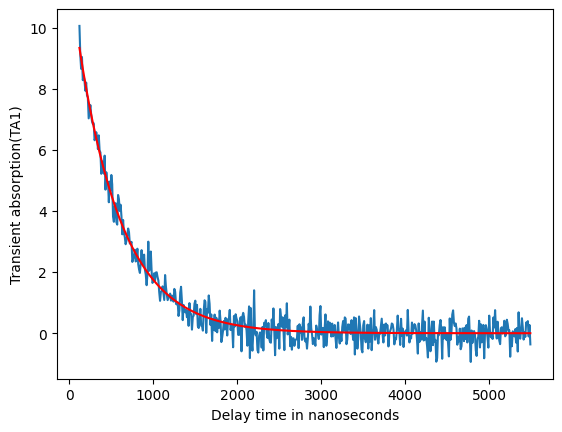

In [171]:
plt.plot(x1, y1_03mm)
plt.plot(x1, exp(x1, *potp01), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA1)')
plt.show()

In [172]:
potp01

array([ 1.17337972e+01, -1.90673786e-03])

In [173]:
#lifetime for t1 in nanosecond
lifetimes_03mm[0]

524.455940846923

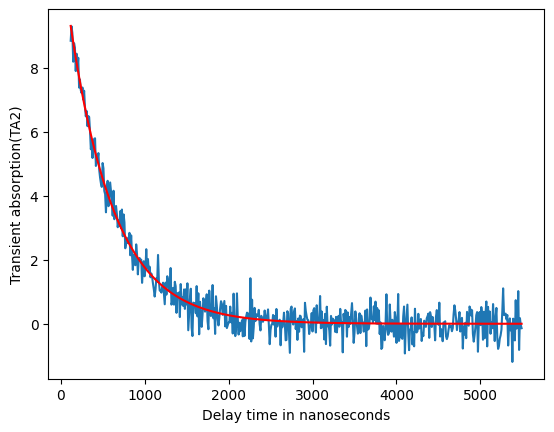

In [174]:
plt.plot(x1, y2_03mm)
plt.plot(x1, exp(x1, *potp02), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA2)')
plt.show()

In [175]:
potp02

array([ 1.16870284e+01, -1.88911530e-03])

In [176]:
lifetimes_03mm[1]

529.3483152291282

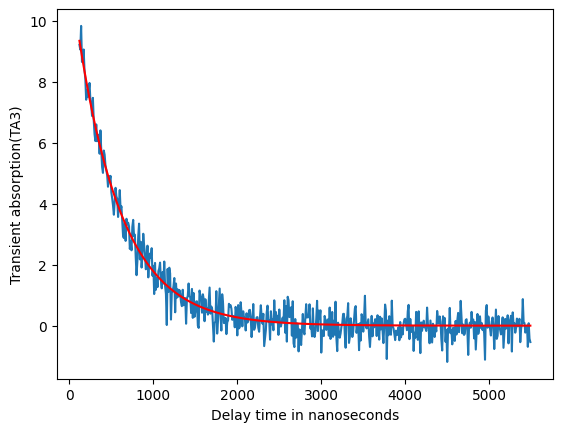

In [177]:
plt.plot(x1, y3_03mm)
plt.plot(x1, exp(x1, *popt03), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA3)')
plt.show()

In [178]:
potp03

array([ 1.17216513e+01, -1.88386107e-03])

In [179]:
lifetimes_03mm[2]

530.8247072096918

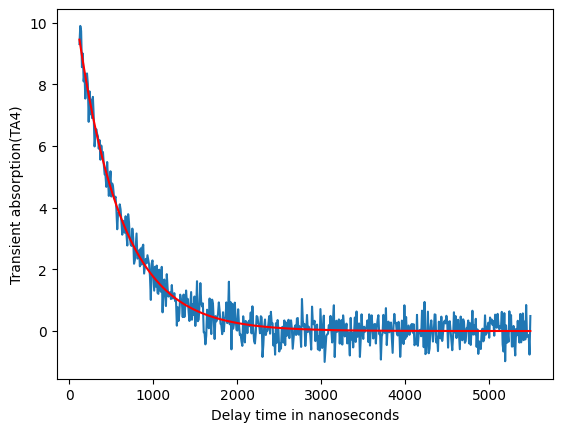

In [180]:
plt.plot(x1, y4_03mm)
plt.plot(x1, exp(x1, *potp04), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA4)')
plt.show()

In [181]:
potp04

array([ 1.18858893e+01, -1.91142776e-03])

In [182]:
#decay time for t4
lifetimes_03mm[3]

523.1691312441119

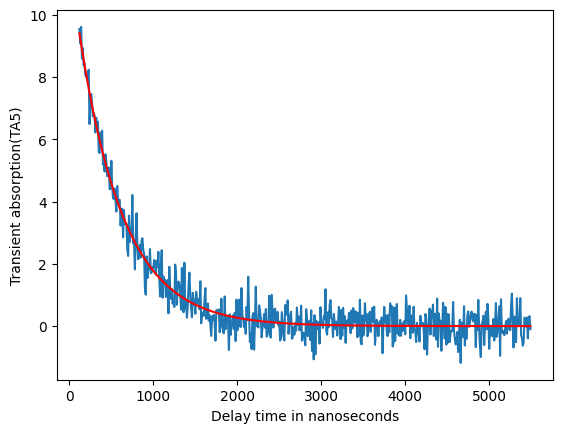

In [183]:
plt.plot(x1, y5_03mm)
plt.plot(x1, exp(x1, *potp05), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption(TA5)')
plt.show()

In [184]:
potp05

array([ 1.18081722e+01, -1.89423628e-03])

In [185]:
#decay time for t5 in nanosecond
lifetimes_03mm[4]

527.917245016861

plot of the lifetime obtain through the various trials we get the following

In [186]:
series_03mm = pd.Series([1,2,3,4,5])

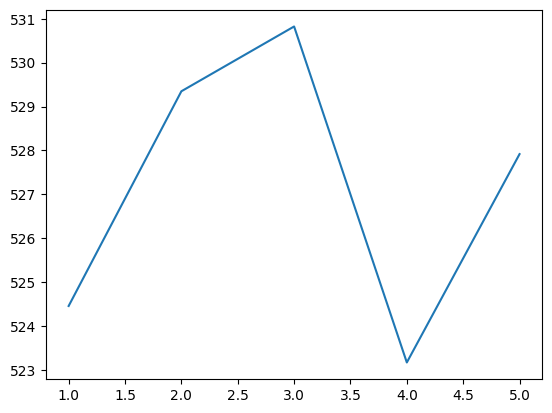

In [187]:
plt.plot(series_03mm, lifetimes_03mm)

In [188]:
lifetimes_03mm.mean()

527.1430679093431

Trial number is on the x-axis and decay time is on the y-axis. Clearly there is some variation, between around 520-530 ns. we get mean of lifetime is 527.143

If we instead use the average absorption over all 5 trials at each delay time, we get the following

link for 0.3mm : {https://drive.google.com/file/d/142vMiY02LhO6T1mRLj--9zdScD5qzZ9X/view?usp=drive_link}

In [189]:
data_03mm = pd.read_csv('/content/0.3 mm.csv', delimiter=';')

In [190]:
data_03mm.head()

,Laser Delay [ns],TA [mOD]
0,-400,-0.175844
1,-390,0.029595
2,-380,0.149227
3,-370,-0.169331
4,-360,-0.154283


In [191]:
x_03 = data_03mm.iloc[52:-1,0].values
y_03 = data_03mm.iloc[52:-1,1].values

In [192]:
popt_03, pcov_03 = curve_fit(exp, x_03, y_03, p0 = [500, -0.00033333333])

Text(0, 0.5, 'Transient absorption')

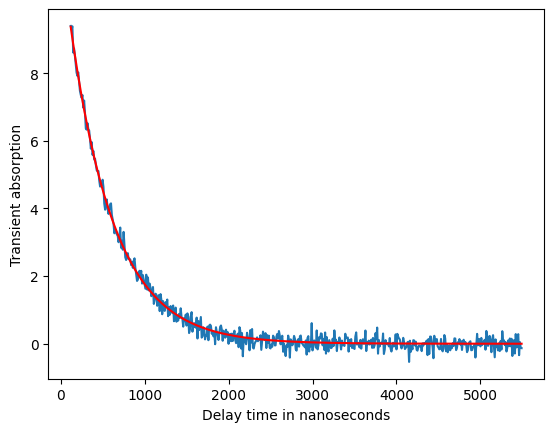

In [193]:
plt.plot(x_03, y_03)
plt.plot(x_03, exp(x_03, *popt_03), 'r-')
plt.xlabel('Delay time in nanoseconds')
plt.ylabel('Transient absorption')

In [194]:
popt_03

array([ 1.17673954e+01, -1.89710734e-03])

In [195]:
lifetime = -1/popt_03[1]

In [196]:
lifetime # lifetime or decay time for averall data

527.1183025747748

In [197]:
lifetimes_03mm.mean()

527.1430679093431

we get nearly same decay value

In [207]:
#for 0.3mm
pd.DataFrame(lifetimes_03mm)

,0
0,524.455941
1,529.348315
2,530.824707
3,523.169131
4,527.917245


In [208]:
#for 1mm
pd.DataFrame(lifetimes)

,0
0,558.269595
1,555.024853
2,559.868993
3,562.105059
4,562.349043
